In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install tensorflow


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import os

# Path to your dataset directory
base_dir = '/content/drive/MyDrive/wheat_leaf'  # Update this to your actual path

# Data generators with training/validation split
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Use 20% of the data for validation
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Set as training data
)

val_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Set as validation data
)

# Load pre-trained DenseNet121 model + higher level layers
base_model = DenseNet121(weights='imagenet', include_top=False)

# Add global average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add fully connected layer and a logistic layer with 3 classes
predictions = Dense(3, activation='softmax')(x)

# Model to train
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze all convolutional DenseNet layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    train_generator,
    epochs=3,
    validation_data=val_generator
)

# Save the trained model
model.save('wheat_leaf_densenet.h5')


Found 327 images belonging to 3 classes.
Found 80 images belonging to 3 classes.
Epoch 1/3
11/11 [==============================] - 144s 12s/step - loss: 1.1855 - accuracy: 0.4098 - val_loss: 0.9575 - val_accuracy: 0.5375
Epoch 2/3
11/11 [==============================] - 120s 11s/step - loss: 0.8686 - accuracy: 0.6024 - val_loss: 0.8006 - val_accuracy: 0.6500
Epoch 3/3
11/11 [==============================] - 121s 11s/step - loss: 0.6790 - accuracy: 0.7492 - val_loss: 0.7036 - val_accuracy: 0.6875


1/1 [==============================] - 4s 4s/step
Image path: /content/drive/MyDrive/wheat_leaf/Healthy/loh(42).JPG
Predicted class: stripe_rust


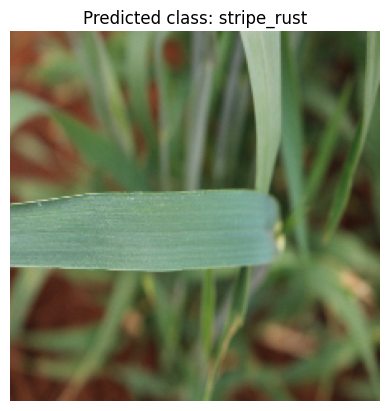

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model('wheat_leaf_densenet.h5')

def predict_image(img_path):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0  # Normalize the image

    # Make predictions
    preds = model.predict(x)
    class_idx = np.argmax(preds[0])

    # Class labels
    class_labels = ['healthy', 'septoria', 'stripe_rust']
    predicted_class = class_labels[class_idx]

    # Print the prediction
    print(f'Image path: {img_path}')
    print('Predicted class:', predicted_class)

    # Display the image
    plt.imshow(img)
    plt.title(f'Predicted class: {predicted_class}')
    plt.axis('off')
    plt.show()

# Example usage
img_path = '/content/drive/MyDrive/wheat_leaf/Healthy/loh(42).JPG'  # Replace with your image path
predict_image(img_path)
